# Analyse des scores pour déterminer le meilleur modèle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

datas = pd.read_csv("Pélec_10_scores.csv", index_col=0)
datas

,Ridge,SVR,LR,Lasso,XGB,RFR
train_score,0.727402,0.682374,0.679483,0.679451,0.762319,0.497067
test_score,0.624098,0.548188,0.541535,0.541502,0.632045,0.444516


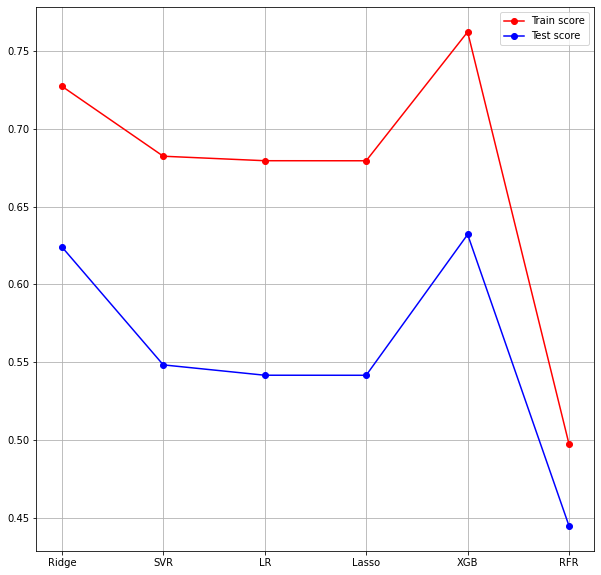

In [2]:
fig = plt.figure(figsize=(10, 10))

plt.plot([x for x in datas.columns], [datas.loc["train_score", x] for x in datas.columns], "ro-", label= "Train score")
plt.plot([x for x in datas.columns], [datas.loc["test_score", x] for x in datas.columns], "bo-", label= "Test score")

plt.grid(True, which= "both" , axis="both")

plt.legend()
plt.show()

On peut éliminer d'emblée les modèles SVR, Régression Linéaire, Lasso et Random Forest Regressor dont les scores sont trop bas

faire graph en barre

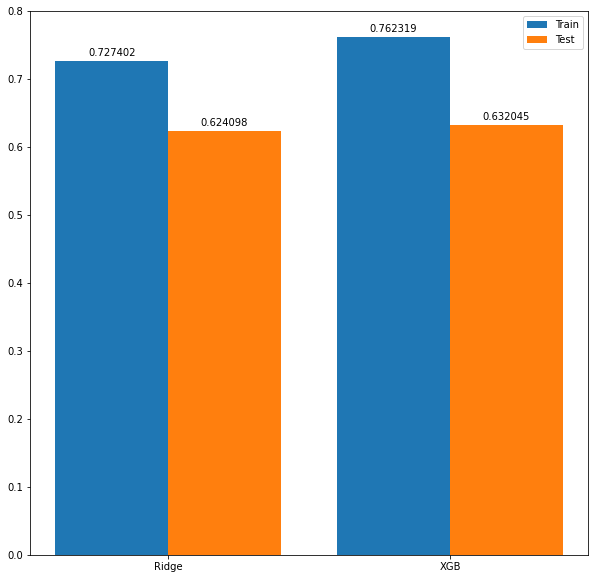

In [3]:
labels = ["Ridge", "XGB"]
train_scores = [datas.loc["train_score", x] for x in ["Ridge", "XGB"]]
test_scores = [datas.loc["test_score", x] for x in ["Ridge", "XGB"]]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, train_scores, width, label= "Train")
rects2 = ax.bar(x + width/2, test_scores, width, label= "Test")

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.ylim(0, 0.8)

ax.legend()
plt.show()


On peut voir que les scores de Ridge et du Gradient Boosting (XGB) sont du même ordre de grandeur. Néanmoins, XGB a des scores légèrement supérieur sans présenter d'overfitting

## Conclusion pour la prédiction de la consommation d'énergie ("SiteEnergyUsekBtu")

À scores quasiment similaires, le modèle Gradient Boosting sera gardé pour la prédiction car il est légèrement plus optimisé.

Après optimisation:
* Modèle => XGBRegressor
* Hyperparamètres =>
  * colsample_bytree: 0,6
  * gamma: 0,01
  * max_depth: 2
  * min_child_weight: 1
  * n_estimators: 138
  * objective: reg:squarederror
  * reg_alpha: 1.0
  * reg_lambda: 0.1
  * seed: 42 
  * subsample: 0.9
